***Unsupervised Learning***

## **Clustering**

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.

## **DBSCAN**

Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm that is commonly used in data mining and machine learning.

Based on a set of points (let’s think in a bidimensional space as exemplified in the figure), DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

<img src = "https://i.ytimg.com/vi/6jl9KkmgDIw/maxresdefault.jpg">

<img src ="https://miro.medium.com/max/627/1*yT96veo7Zb5QeswV7Vr7YQ.png">

<img src ="https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif">

<img src = "https://miro.medium.com/max/2678/1*KqWII7sFp1JL0EXwJGpqFw.png">


## **Getting Started with DBSCAN Clustering**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets
import numpy as np

## **Loading Dataset**



In [3]:
x,y = datasets.make_moons(n_samples=5500, noise= 0.05)

x1 = x[:,0]
x2 = x[:,1]

In [4]:
x

array([[ 0.02645419,  0.38008761],
       [ 0.03836593,  0.31456927],
       [ 1.83703542, -0.05133081],
       ...,
       [ 1.78798175, -0.17123247],
       [ 0.17661419, -0.13240629],
       [ 1.18086732, -0.57178651]])

In [5]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [6]:
x1

array([0.02645419, 0.03836593, 1.83703542, ..., 1.78798175, 0.17661419,
       1.18086732])

In [7]:
x2

array([ 0.38008761,  0.31456927, -0.05133081, ..., -0.17123247,
       -0.13240629, -0.57178651])

## **Visualization of dataset**

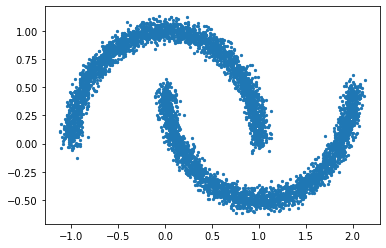

In [8]:
plt.scatter(x1,x2,s=5)
plt.show()

## **Finding an Optimal value of Eps**

<img src ="https://miro.medium.com/max/700/1*KuRf8j7JUZSwA_-NPXog5g.png">

In [9]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

In [10]:
neigh

NearestNeighbors(n_neighbors=3)

In [11]:
distances

array([[0.        , 0.0002631 , 0.00391798],
       [0.        , 0.01030035, 0.01182592],
       [0.        , 0.00858991, 0.01015272],
       ...,
       [0.        , 0.00861987, 0.00872572],
       [0.        , 0.01645343, 0.01679421],
       [0.        , 0.01524281, 0.02511571]])

In [12]:
indices

array([[   0, 4841, 1596],
       [   1, 4503, 2474],
       [   2,  902,  630],
       ...,
       [5497, 5422, 1154],
       [5498, 1940, 3752],
       [5499, 1345, 1584]], dtype=int64)

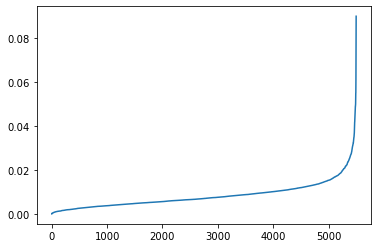

In [13]:
distances = np.sort(distances, axis=0) # numpy sorting algo (uses quick sort)
distances = distances[:,1]
plt.plot(distances)

In [14]:
distances

array([3.16270719e-06, 3.16270719e-06, 2.35374228e-04, ...,
       7.97193343e-02, 8.29639496e-02, 8.99167962e-02])


## **Training with DBSCAN Model**

In [15]:
model = DBSCAN(eps = 0.050)
model.fit(x)
y_pred = model.labels_.astype(np.int)

## **Visualization of Clusters**

Clusters:



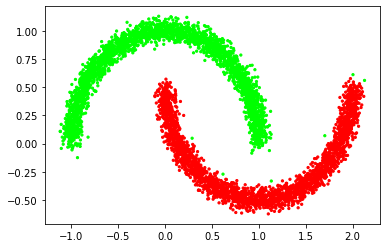

In [16]:
colors = np.array(['#ff0000','#00ff00'])
print("Clusters:\n")
plt.scatter(x1,x2,s=5,color = colors [y_pred])
plt.show()